# Выбор набора данных, анализ и заполнение пропусков

In [32]:
import pandas as pd

df = pd.read_csv('house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [33]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбец.'.format(row_number, column_number))

Данный датасет содержит 21613 строк и 21 столбец.


In [34]:
null_flag = False
null_columns = {}
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        null_flag = True
        column_type = df[col].dtype
        null_columns[col] = column_type
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))
        
if not null_flag:
    print('Пропуски в данных отсутствуют.')

Пропуски в данных отсутствуют.


In [35]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

date


In [36]:
df['year'] = df['date'].str.slice(0,4)
df['month'] = df['date'].str.slice(4,6)
df['day'] = df['date'].str.slice(6,8)

df = df.loc[:, df.columns != 'date']

In [37]:
df = df.loc[:, df.columns != 'date']

In [7]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

year
month
day


# Разведочный анализ данных

In [38]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [39]:
grouped_data_price_year = df.groupby('year').id.nunique().reset_index()
grouped_data_price_year

year     id
0  2014  14599
1  2015   6972

In [40]:
import plotly.express as px
fig = px.bar(grouped_data_price_year, x='year', y='id')
fig.show()

In [41]:
grouped_data_condition = df.groupby('condition').id.nunique().reset_index()
grouped_data_condition

condition     id
0          1     29
1          2    164
2          3  13911
3          4   5645
4          5   1687

In [42]:
fig = px.bar(grouped_data_condition, x='condition', y='id')
fig.show()

In [43]:
grouped_data_view = df.groupby('view').id.nunique().reset_index()
grouped_data_view

view     id
0     0  19320
1     1    331
2     2    962
3     3    507
4     4    316

In [44]:
fig = px.bar(grouped_data_view, x='view', y='id')
fig.show()

In [45]:
fig = px.scatter(df, 
                 x="sqft_living", 
                 y="sqft_lot",
                 size="price", 
                 color="year")
fig.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
BBox = (df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max())

In [48]:
ruh_m = plt.imread('map.png')

In [49]:
price_q1 = df.describe()['price']['25%']
price_q2 = df.describe()['price']['50%']
price_q3 = df.describe()['price']['75%']

df_g1 = df[df.price < price_q1]
df_g2 = df[(df.price >= price_q1) & (df.price < price_q2)]
df_g3 = df[(df.price >= price_q2) & (df.price < price_q3)]
df_g4 = df[df.price > price_q3]

data = (df_g1,df_g2,df_g3,df_g4)
colors = ("red", "green", "blue","yellow")
groups = ("price < Q1", 
          "Q1 <= price < Q2", 
          "Q2 <= price < Q3",
          "price > Q3",
         )

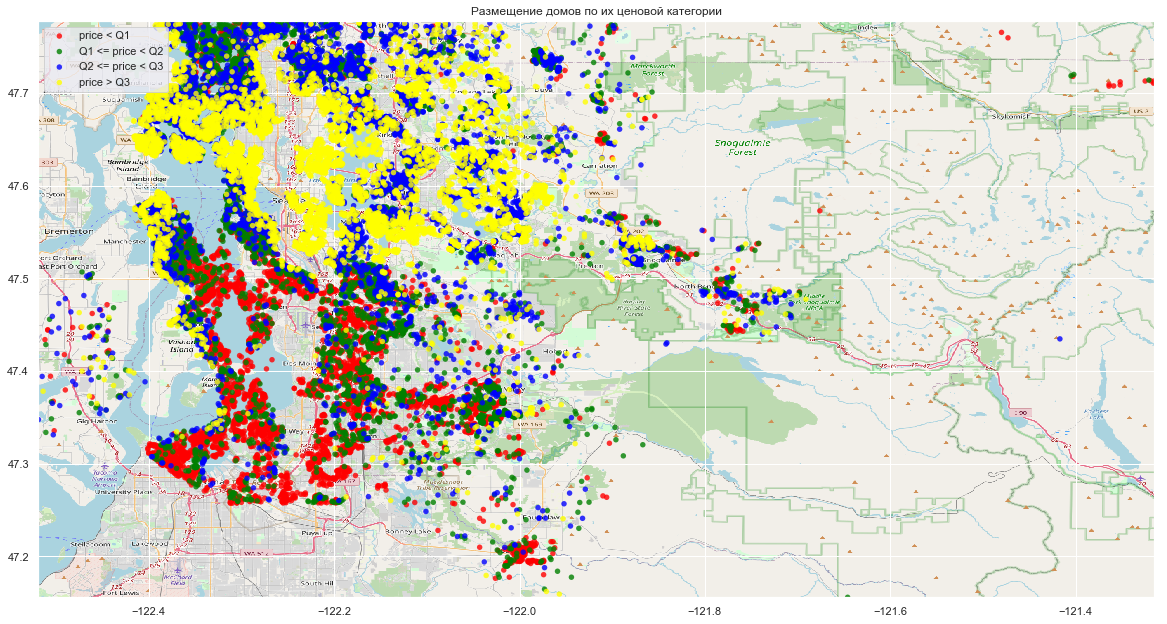

In [50]:
price_q1 = df.describe()['price']['25%']
price_q2 = df.describe()['price']['50%']
price_q3 = df.describe()['price']['75%']

df_g1 = df[df.price < price_q1]

fig, ax = plt.subplots(figsize = (20,20))

for data, color, group in zip(data, colors, groups):
    x = data['long']
    y = data['lat']
    ax.scatter(x, y, alpha=0.8, c=color, 
               edgecolors='none', s=30, label=group)

ax.set_title('Размещение домов по их ценовой категории')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.legend(loc=2)
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

На основе данного графика можно увидеть, что местоположение достаточно сильно коррелирует с ценой, следовательно данный признак будет использоваться при обучении моделей.

# Корреляционный анализ данных

In [51]:
corr_matrix = df.corr()
corr_matrix['price'].nlargest(4)

price          1.000000
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
Name: price, dtype: float64

Для обучения моделей будут использоваться наиболее коррелирующие признаки, а также местоположение дома.

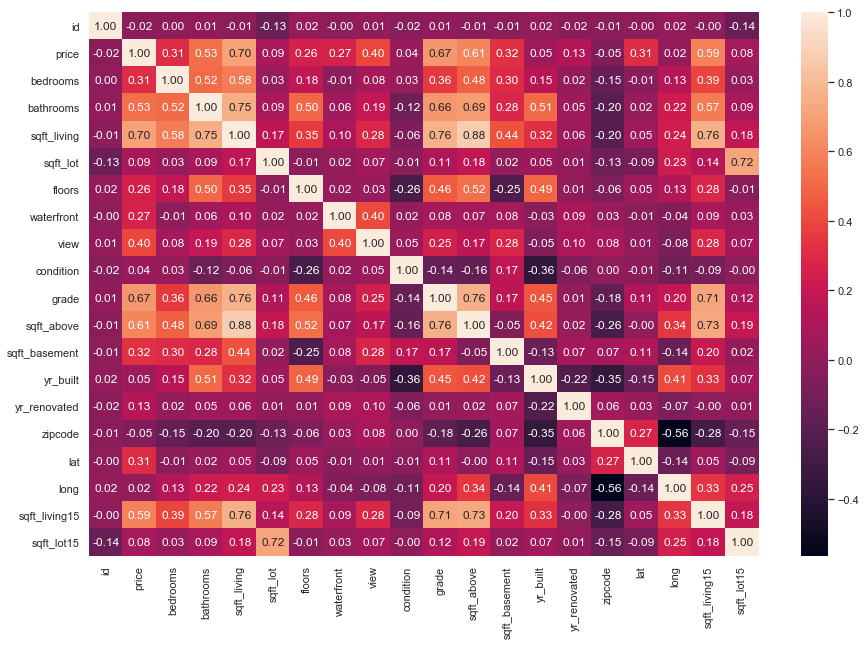

In [192]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix,annot=True,fmt=".2f")

In [53]:
fig = px.scatter(df, x="price", y="sqft_living",
         size="sqft_above", color="grade")
fig.show()

# Обучение моделей

In [ ]:
Для оценки качества моделей будут использоваться следующие метрики: коэффициент детерминации и средняя абсолютная ошибка

## Формирование обучающей и тестовой выбрки 

In [188]:
from sklearn.model_selection import train_test_split

df_x = df[['sqft_living','lat','long',
           'grade','sqft_above']]

df_y = df['price']

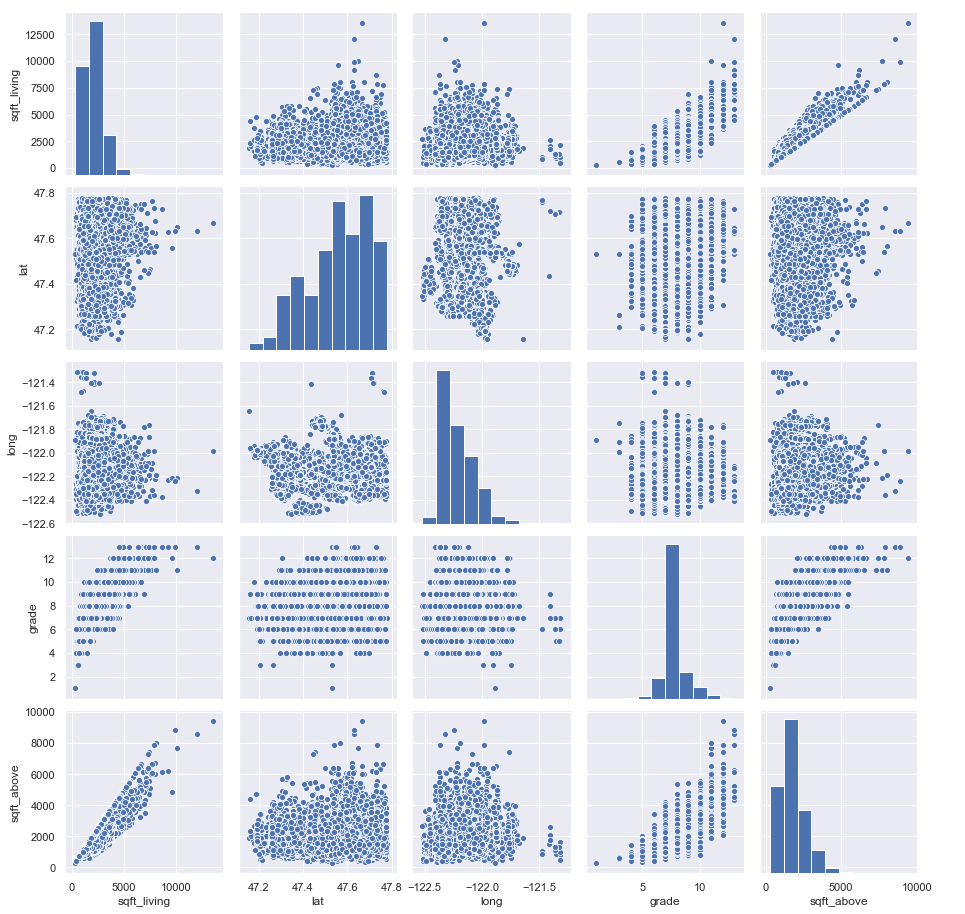

In [189]:
sns.pairplot(df_x)

## Масштабирование данных

In [145]:
from sklearn.preprocessing import StandardScaler

df_x = df[['sqft_living',
           'grade','sqft_above','lat','long']]

df_y = df['price']

columns = df_x.columns
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [146]:
train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(df_x,df_y,
                                     test_size=0.3, random_state=1)

In [147]:
row_number_train = train_x_df.shape[0]
column_number_train = train_x_df.shape[1]

print('Тренировочный датасет содержит {} строки и {} столбцов.'.format(row_number_train, column_number_train))

Тренировочный датасет содержит 15129 строки и 5 столбцов.


In [148]:
row_number_test = test_x_df.shape[0]
column_number_test = test_x_df.shape[1]

print('Тестовый датасет содержит {} строки и {} столбцов.'.format(row_number_test, column_number_test))

Тестовый датасет содержит 6484 строки и 5 столбцов.


## Метод K-ближайших соседей

### Обучение с произвольным гипер-параметром 

In [149]:
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressorObj = KNeighborsRegressor()
KNeighborsRegressorObj.fit(train_x_df, train_y_df)
target_k = KNeighborsRegressorObj.predict(test_x_df)

In [150]:
r2_k = r2_score(test_y_df, target_k)
mae_k = mean_absolute_error(test_y_df, target_k)

print('Коэффициент детерминации - %.2f' % r2_k)
print('Средняя абсолютная ошибка - %.2f' % mae_k)

Коэффициент детерминации - 0.79
Средняя абсолютная ошибка - 89861.54


### Подбор гипер-параметров 

In [151]:
tuned_parameters_k = [{'n_neighbors': np.array(range(1,100,4))}]

gs_k = GridSearchCV(KNeighborsRegressor(),
                      param_grid=tuned_parameters_k,
                      cv=RepeatedKFold(n_splits=3, n_repeats=2), 
                      scoring='r2')
gs_k.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
       69, 73, 77, 81, 85, 89, 93, 97])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [152]:
gs_k.best_estimator_.fit(train_x_df, train_y_df)
target_k_best = gs_k.best_estimator_.predict(test_x_df)

In [153]:
r2_k_best = r2_score(test_y_df, target_k_best)
mae_k_best = mean_absolute_error(test_y_df, target_k_best)

print('Коэффициент детерминации - %.2f' % r2_k_best)
print('Средняя абсолютная ошибка - %.2f' % mae_k_best)

Коэффициент детерминации - 0.78
Средняя абсолютная ошибка - 89039.82


## Случайный лес 

### Обучение с произвольным гипер-параметром 

In [154]:
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(n_estimators=1, 
                               oob_score=False, 
                               random_state=1)
tree.fit(train_x_df, train_y_df)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [155]:
target_t = tree.predict(test_x_df)

In [156]:
r2_t = r2_score(test_y_df, target_t)
mae_t = mean_absolute_error(test_y_df, target_t)

print('Коэффициент детерминации - %.2f' % r2_t)
print('Средняя абсолютная ошибка - %.2f' % mae_t)

Коэффициент детерминации - 0.63
Средняя абсолютная ошибка - 116077.51


### Подбор гипер-параметров 

In [157]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

gs_t = GridSearchCV(estimator=RandomForestRegressor(),
                    param_grid=params, 
                    scoring='r2', 
                    cv=3, 
                    n_jobs=-1)

gs_t.fit(train_x_df, train_y_df)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [158]:
gs_t.best_estimator_.fit(train_x_df, train_y_df)
target_t_best = gs_t.best_estimator_.predict(test_x_df)

In [159]:
r2_t_best = r2_score(test_y_df, target_t_best)
mae_t_best = mean_absolute_error(test_y_df, target_t_best)

print('Коэффициент детерминации - %.2f' % r2_t_best)
print('Средняя абсолютная ошибка - %.2f' % mae_t_best)

Коэффициент детерминации - 0.83
Средняя абсолютная ошибка - 81834.90


In [160]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100)

svr.fit(train_x_df, train_y_df)

target_svr = svr.predict(test_x_df)

In [161]:
r2_svr = r2_score(test_y_df, target_svr)
mae_svr = mean_absolute_error(test_y_df, target_svr)

print('Коэффициент детерминации - %.2f' % r2_svr)
print('Средняя абсолютная ошибка - %.2f' % mae_svr)

Коэффициент детерминации - 0.50
Средняя абсолютная ошибка - 137251.87


In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

tuned_parameters_svr = [{'C': np.arange(300,350,5)}]

gs_svr = GridSearchCV(SVR(kernel='linear'),
                      param_grid=tuned_parameters_svr,
                      cv=RepeatedKFold(n_splits=3, n_repeats=2), 
                      scoring='r2',
                      n_jobs=-1
                     )
gs_svr.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [184]:
gs_svr.best_estimator_.fit(train_x_df, train_y_df)
target_svr_best = gs_svr.best_estimator_.predict(test_x_df)

In [185]:
r2_svr_best = r2_score(test_y_df, target_svr_best)
mae_svr_best = mean_absolute_error(test_y_df, target_svr_best)

print('Коэффициент детерминации - %.2f' % r2_svr_best)
print('Средняя абсолютная ошибка - %.2f' % mae_svr_best)

Коэффициент детерминации - 0.52
Средняя абсолютная ошибка - 135934.62


## Бэггинг

## Обучение с произвольным гипер-параметром 

In [166]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)
br.fit(train_x_df, train_y_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:1056: UserWarning:

Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.



BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=5, n_jobs=None,
                 oob_score=True, random_state=10, verbose=0, warm_start=False)

In [167]:
target_br = br.predict(test_x_df)

In [168]:
r2_br = r2_score(test_y_df, target_br)
mae_br = mean_absolute_error(test_y_df, target_br)

print('Коэффициент детерминации - %.2f' % r2_t)
print('Средняя абсолютная ошибка - %.2f' % mae_t)

Коэффициент детерминации - 0.63
Средняя абсолютная ошибка - 116077.51


### Подбор гипер-параметров 

In [172]:
tuned_parameters_br = [{'n_estimators': np.arange(1,10,1)}]

gs_br = GridSearchCV(BaggingRegressor(),
                      param_grid=tuned_parameters_br,
                      cv=RepeatedKFold(n_splits=3, n_repeats=2), 
                      scoring='r2')
gs_br.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [173]:
gs_br.best_estimator_.fit(train_x_df, train_y_df)
target_br_best = gs_br.best_estimator_.predict(test_x_df)

In [174]:
r2_br_best = r2_score(test_y_df, target_br_best)
mae_br_best = mean_absolute_error(test_y_df, target_br_best)

print('Коэффициент детерминации - %.2f' % r2_br_best)
print('Средняя абсолютная ошибка - %.2f' % mae_br_best)

Коэффициент детерминации - 0.82
Средняя абсолютная ошибка - 86514.08


# Вывод

In [186]:
print('K-means')
print('Коэффициент детерминации - %.2f' % r2_k_best)
print('Средняя абсолютная ошибка - %.2f' % mae_k_best)

print('\nRandom forest')
print('Коэффициент детерминации - %.2f' % r2_t_best)
print('Средняя абсолютная ошибка - %.2f' % mae_t_best)

print('\nSVR')
print('Коэффициент детерминации - %.2f' % r2_svr_best)
print('Средняя абсолютная ошибка - %.2f' % mae_svr_best)

print('\nBagging')
print('Коэффициент детерминации - %.2f' % r2_br_best)
print('Средняя абсолютная ошибка - %.2f' % mae_br_best)

K-means
Коэффициент детерминации - 0.78
Средняя абсолютная ошибка - 89039.82

Random forest
Коэффициент детерминации - 0.83
Средняя абсолютная ошибка - 81834.90

SVR
Коэффициент детерминации - 0.52
Средняя абсолютная ошибка - 135934.62

Bagging
Коэффициент детерминации - 0.82
Средняя абсолютная ошибка - 86514.08


На основе проделанных экспериментов можно сделать вывод о том, что наилучшей моделью по коэффициенту детерминации для заданного набора данных является Random forest.